<h2><font color="#004D7F" size=6>Módulo 7. Proyectos de Machine Learning</font></h2>



<h1><font color="#004D7F" size=5>3. Proyecto de Regresión</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Alonso Otiniano Zavala</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Importar librerías](#section11)
    * [2.1. Cargar el dataset](#section12)
* [2. Estadística descriptiva](#section2)
    * [2.1. Dimensiones del dataset](#section21)
    * [2.2. Visualización de datos](#section22)
    * [2.3. Resumen estadístico](#section23)
    * [2.4. Tipo de datos](#section24)
    * [2.5. Correlación entre atributos](#section25)
    * [2.6. Valores NaN](#section26)
* [3. Visualización del dataset](#section3)
    * [3.1. Gráficos Univariado](#section31)
    * [3.2. Gráficos multivariados](#section32)
    * [3.3. Resumen de ideas](#section33)
* [4. Fase de modelado](#section4)
    * [4.1. Crear conjunto de validación](#section41)
    * [4.2. Evaluación de línea base](#section42)
    * [4.3. Evaluar modelos: estandarización](#section43)
* [5. Fase de Optimización](#section5)
    * [5.1. Optimización de k-NN](#section51)
* [6. Agoritmos ensamblados](#section6)
    * [6.1. Comparar algoritmos ensamblados](#section61)
    * [6.2. Fase de optimización GBM](#section62)
* [7. Fase de forecasting](#section7)

In [1]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>


Para este proyecto, trabajaremos el conjunto de datos _Boston House Price._ Cada registro en la base de datos describe un suburbio de la ciudad de Boston. Los datos se extrajeron del área estadística metropolitana estándar de Boston (SMSA) en 1970. Los atributos se definen de la siguiente manera:
* CRIM: tasa de criminalidad per cápita por ciudad.
* ZN: proporción de tierra residencial zonificada para lotes de más de 25000 pies cuadrados.
* INDUS: proporción de acres de negocios no minoristas por ciudad.
* CHAS: variable ficticia del río Charles (=1 si el trecho delimita el río; 0 de lo contrario).
* NOX: concentración de óxidos nítricos (partes por 10 millones).
* RM: número medio de habitaciones por vivienda.
* AGE: proporción de unidades ocupadas por el propietario construidas antes de 1940.
* DIS: distancias ponderadas a cinco centros de empleo de Boston.
* RAD: índice de accesibilidad a autopistas radiales.
* TAX: tasa de impuesto a la propiedad de valor total por USD10000. 
* PTRATIO: proporción alumno-profesor por ciudad.
* B: $1000(Bk - 0.63)^2$ donde Bk es la proporción de personas de color por ciudad
* LSTAT: % menor estado de la población.
* MEDV: valor medio de las viviendas ocupadas por sus propietarios en USD1000.

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Importar librerías</font>

Primero, importemos todos los módulos, funciones y objetos que vamos a utilizar en este tutorial.

In [1]:
# Classification Project: Sonar rocks or mines

# Load libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

<a id="section12"></a>
## <font color="#004D7F"> 1.2. Cargar el dataset</font>

El conjunto de datos de _Boston Housing Price._ Puede ver que estamos especificando los nombres cortos para cada atributo para que podamos referenciarlos claramente más adelante. También puede ver que los atributos están delimitados por espacios en blanco en lugar de comas en este archivo e indicamos esto a la función `read_csv()` a través del argumento `delim.whitespace`.

In [4]:
# Load dataset
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv(filename, delim_whitespace=True, names=names)

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Estadística descriptiva</font>

Ahora es el momento de estudiar nuestros datos. En este paso vamos a echar un vistazo a los datos de varias maneras diferentes:
* Dimensiones del conjunto de datos.
* Visualización de datos.
* Resumen estadístico de todos los atributos.
* Coorelación de atributos numéricos.
* Tipo de atributos.

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Dimensiones del conjunto de datos</font>

Podemos tener una idea rápida de cuántas instancias (filas) y cuántos atributos (columnas) hay en nuestro conjunto de datos con la propiedad `shape`. 

In [5]:
# shape
dataset.shape

(506, 14)

Puede verse 506 instancias y 14 atributos (incluyendo la clase `MEDV`).

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Visualización de datos</font>

También siempre es una buena idea ver como están representados los datos con la función `head()`

In [8]:
# head
dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Podemos ver las primeras 5 filas de los datos y todas las columnas con la misma distribución. Además, podemos confirmar que las escalas de los atributos están por todas partes debido a las diferentes unidades. Podemos beneficiarnos de algunas transformaciones más adelante.

<a id="section23"></a>
## <font color="#004D7F"> 2.3. Resumen estadístico</font>

En este caso podemos echar un vistazo a un resumen de cada atributo con la función `describe()`. Esto incluye la media, los valores mínimo y máximo, así como algunos percentiles.

In [9]:
# descriptions
pd.set_option('precision', 1)
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


Ahora tenemos una mejor idea de cuán diferentes son los atributos. Los valores mínimos y máximos también son las medias que varían mucho. Es probable que obtengamos mejores resultados volviendo a escalar los datos de alguna manera.

<a id="section24"></a>
## <font color="#004D7F"> 2.4. Tipo de datos</font>

Podemos ver el tipo de variable de cada atributo con la propiedad `dtypes`.

In [10]:
# types
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Podemos ver que todos los atributos son numéricos, en su mayoría valores reales _(float64)_ y algunos han sido interpretados como enteros _(int)_.

<a id="section25"></a>
## <font color="#004D7F"> 2.5. Correlación entre atributos</font>

Como ya hemos visto es importante ver la correlación entre atributos ya que es preferible tener características indpendientes entre ella y dependientes con la clase. Para elo utilizaremos la función `corr(method='pearson')`.

In [12]:
# correlation
pd.set_option('precision', 2)
print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  PTRATIO     B  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58     0.29 -0.39   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31    -0.39  0.18   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72     0.38 -0.36   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04    -0.12  0.05   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67     0.19 -0.38   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29    -0.36  0.13   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51     0.26 -0.27   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53    -0.23  0.29   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91     0.46 -0.44   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  

Esto es interesante. Podemos ver que muchos de los atributos tienen una fuerte correlación (por ejemplo, $>0.70$ o $<−0.70$). Por ejemplo:
* `NOX` y `INDUS` con 0.77.
* `DIS` y `INDUS` con -0.71.
* `TAX` y `INDUS` con 0.72.
* `AGE` y `NOX` con 0.73.
* `DIS` y `NOX` con -0.78.
También parece que `LSTAT` tiene una buena correlación negativa con la variable de salida `MEDV` con un valor de -0.74.

<a id="section26"></a>
## <font color="#004D7F"> 2.6.Valores NaN</font>
Es importante también verificar que no tenemos valores NaN en nuestro dataset. En nuestro caso podemos observar que no tenemos ningún valor NaN en las características.

In [17]:
boston_data = dataset.drop('MEDV',1)
boston_target = dataset['MEDV']

# Después comprobamos los NaN's de nuestros datos, esto podemos hacerlo con Numpy.
print(np.sum(np.isnan(boston_data)))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


Podemos observar que no tenemos ninguń valor perdido en nuestro dataset.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section3"></a>
# <font color="#004D7F"> 3. Visualización del conjunto de datos</font>

Ahora tenemos una idea básica sobre los datos. Necesitamos extender eso con algunas visualizaciones. Vamos a ver dos tipos de gráficos de visualización de datos:
* Gráficos univariados para comprender mejor cada atributo.
* Gráficos multivariados para comprender mejor las relaciones entre los atributos.

<a id="section31"></a>
## <font color="#004D7F"> 3.1. Gráficos Univariados</font>

Comenzamos con algunas gráficas univariadas, es decir, gráficas de cada variable individual. Es útil con la visualización tener una forma de referirse solo a los atributos de entrada y, por otro lado, solo a los atributos de salida. 

<a id="section311"></a>
### <font color="#004D7F"> Boxplots</font>
Dado que las variables de entrada son numéricas, podemos crear Gráficas Boxplots de cada uno.

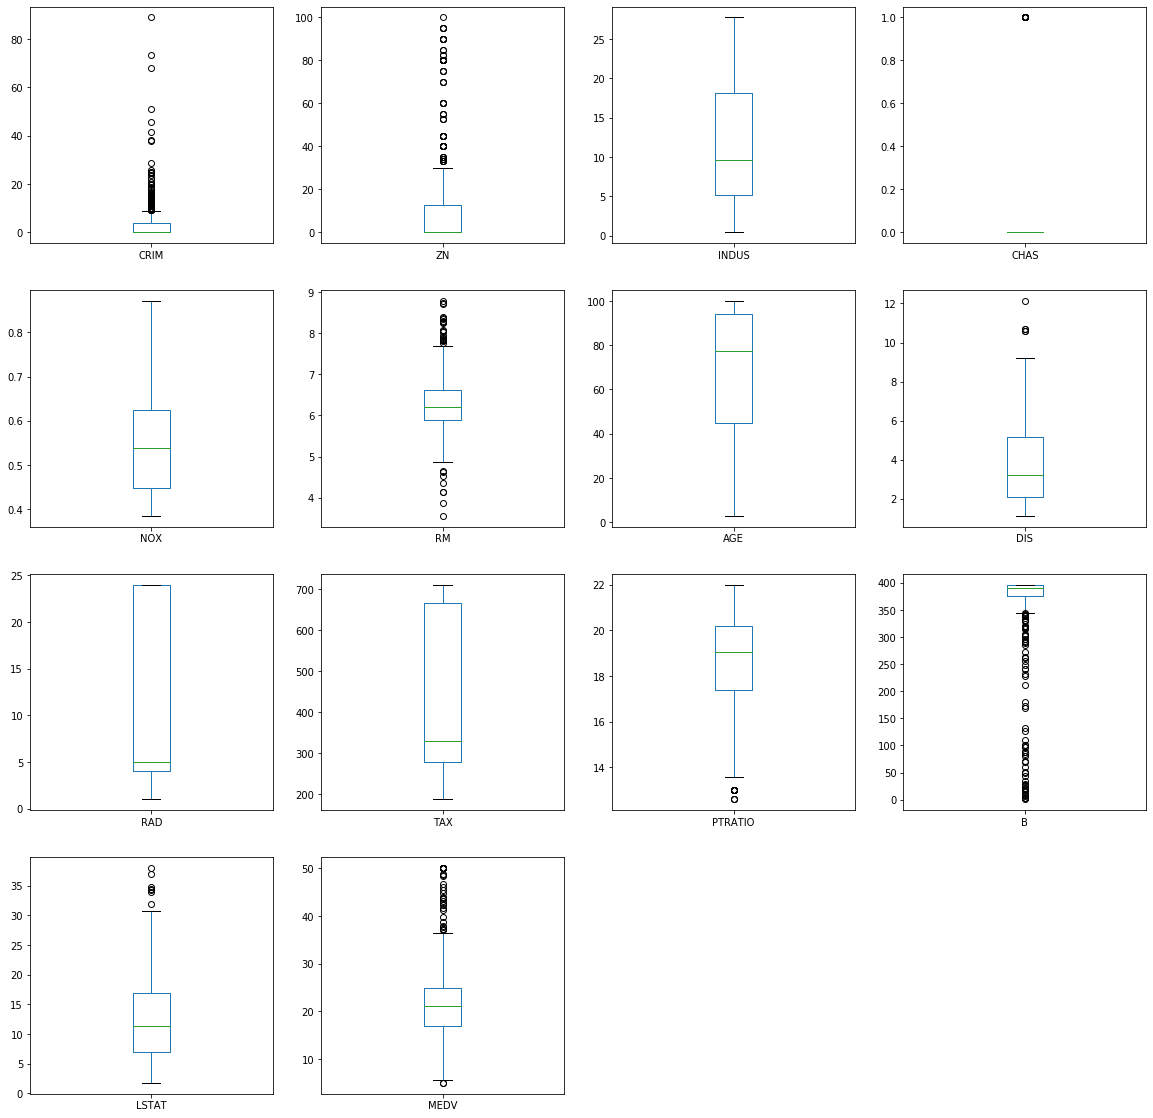

In [24]:
# box and whisker plots - Matplotlib
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
dataset.plot(ax=ax, kind= 'box', subplots=True, layout=(4,4))
plt.show()

Esto ayuda a señalar el sesgo en muchas distribuciones tanto que los datos se ven como valores atípicos (por ejemplo, más allá del bigote de los gráficos).

<a id="section311"></a>
### <font color="#004D7F"> Histograma</font>
También podemos crear un histograma de cada variable de entrada para tener una idea de la distribución. 

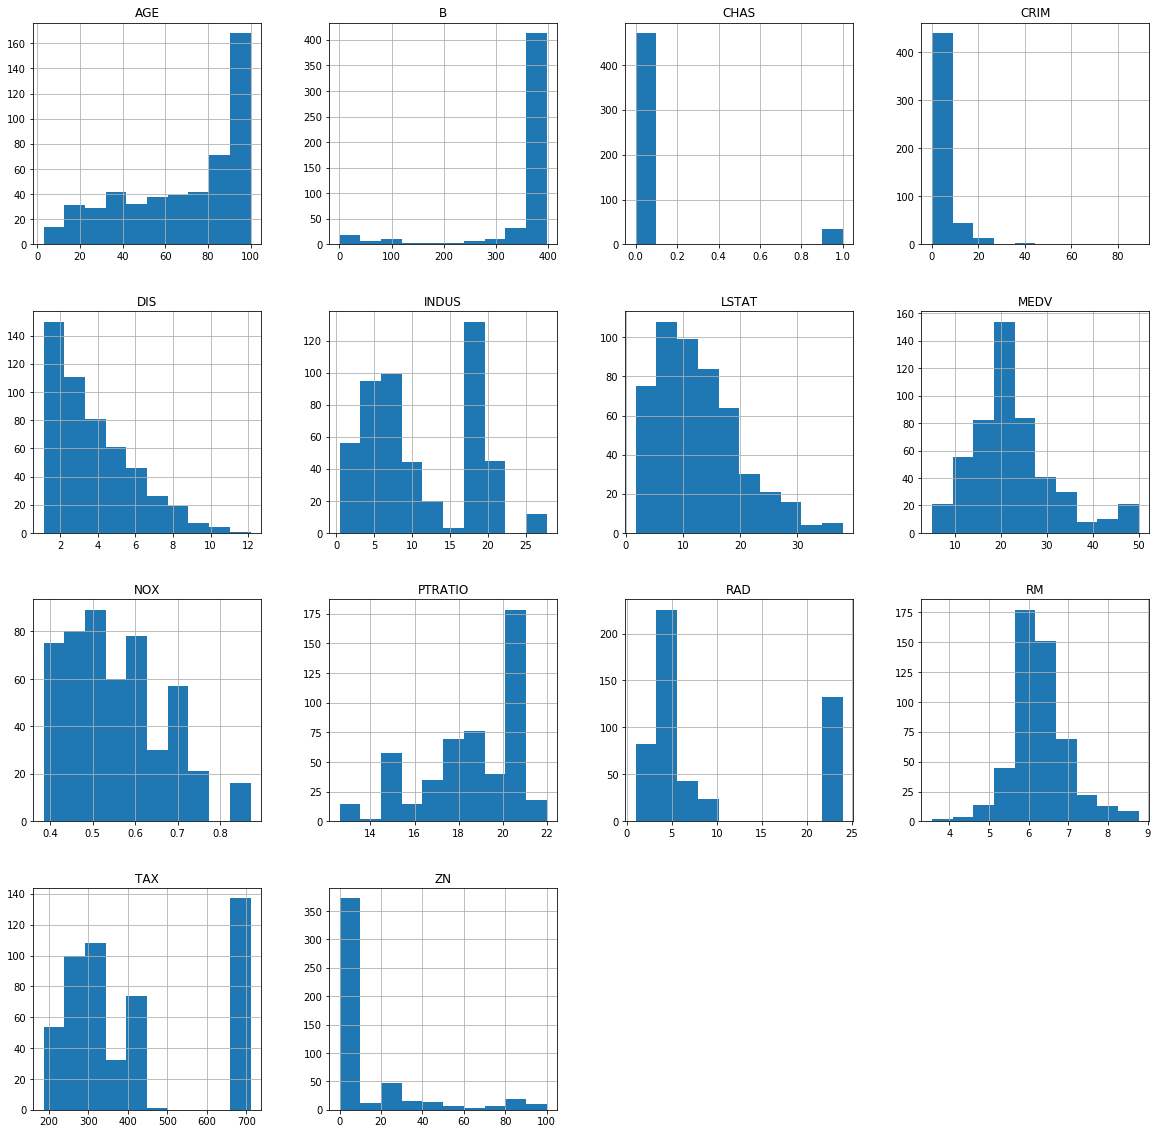

In [18]:
# histograms - Matplotlib
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()

Podemos ver que algunos atributos pueden tener una distribución exponencial, como `CRIM`, `ZN`, `AGE` y `B`. Podemos ver que otros pueden tener una distribución bimodal como `RAD` y `TAX`.

<a id="section311"></a>
### <font color="#004D7F"> Diagrama de densidad</font>
Esto es útil, puede ver que muchos de los atributos tienen una distribución sesgada. Una transformación de potencia como una transformación de Box-Cox que puede corregir el sesgo en las distribuciones podría ser útil.

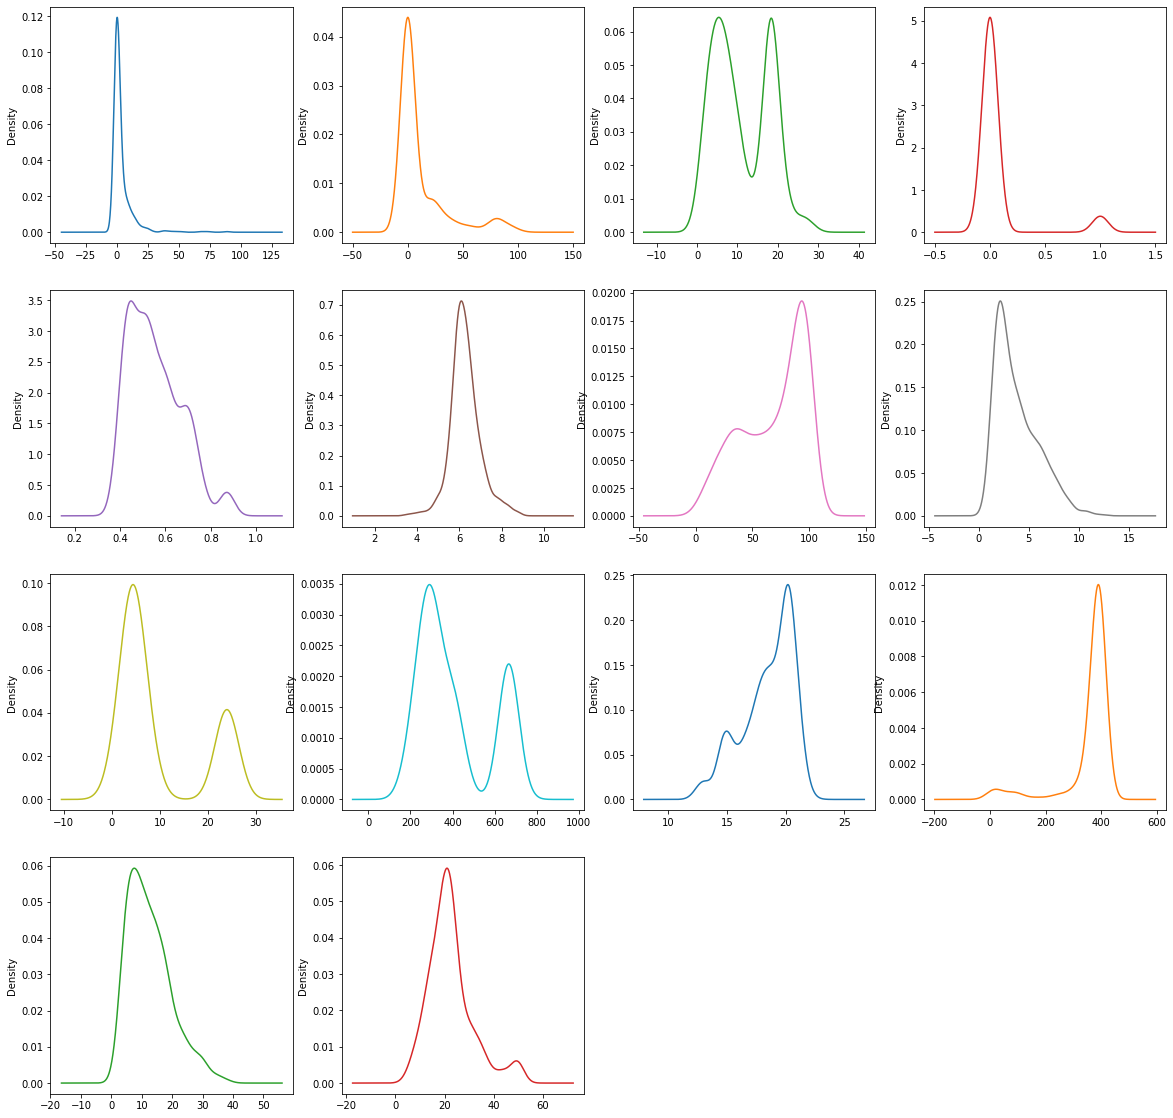

In [21]:
# density
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
dataset.plot(ax=ax, kind='density', subplots=True, layout=(4,4), sharex=False, legend=False)
plt.show()

Esto quizás agrega más evidencia a nuestra sospecha sobre posibles distribuciones exponenciales y bimodales. También parece que `NOX`, `RM` y `LSTAT` pueden tener distribuciones gaussianas sesgadas, lo que podría ser útil más adelante con las transformaciones.

<a id="section32"></a>
## <font color="#004D7F"> 3.2. Gráficos multivariados</font>

Ahora podemos ver las interacciones entre las variables. 

<a id="section321"></a>
### <font color="#004D7F"> Diagramas de dispersión</font>
Primero veamos los diagramas de dispersión de todos los pares de atributos y coloreamos los puntos por clase. Además, como los gráficos de dispersión muestran que los puntos para cada clase generalmente están separados, podemos dibujar puntos suspensivos alrededor de ellos.

Ahora podemos ver las interacciones entre las variables. Veamos gráficos de dispersión de todos los pares de atributos. Esto puede ser útil para detectar relaciones estructuradas entre variables de entrada. Tenga en cuenta la agrupación diagonal de algunos pares de atributos. Esto sugiere una alta correlación y una relación predecible.

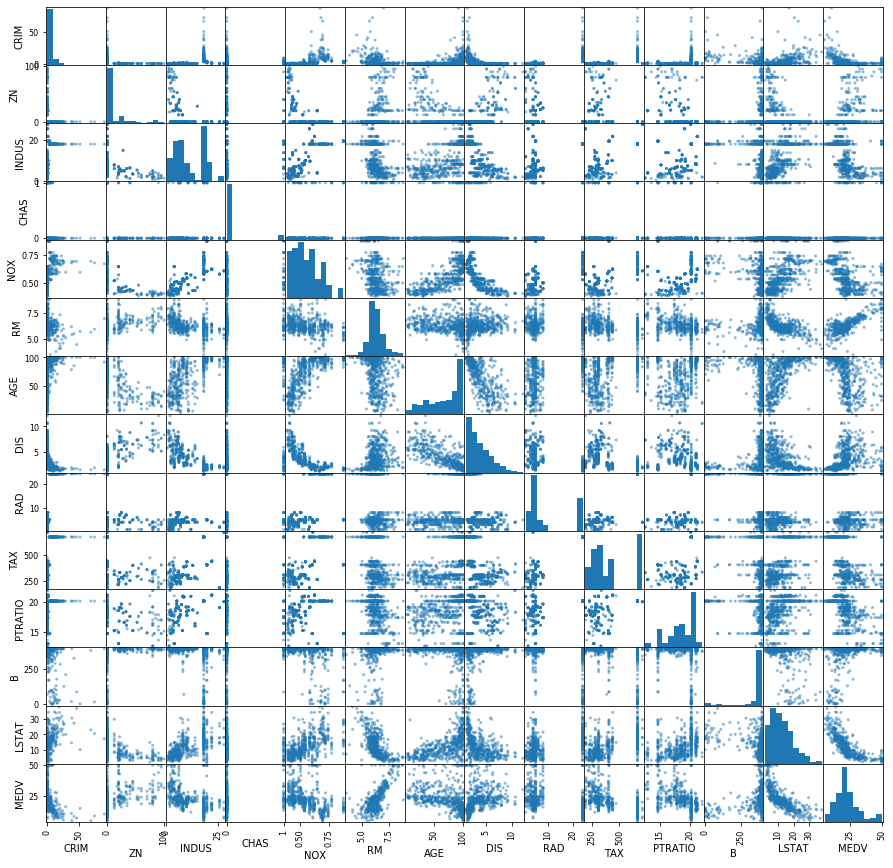

In [27]:
# scatter plot matrix - Matplotlib
plt.rcParams["figure.figsize"] = [15,15]
pd.plotting.scatter_matrix(dataset)
plt.show()

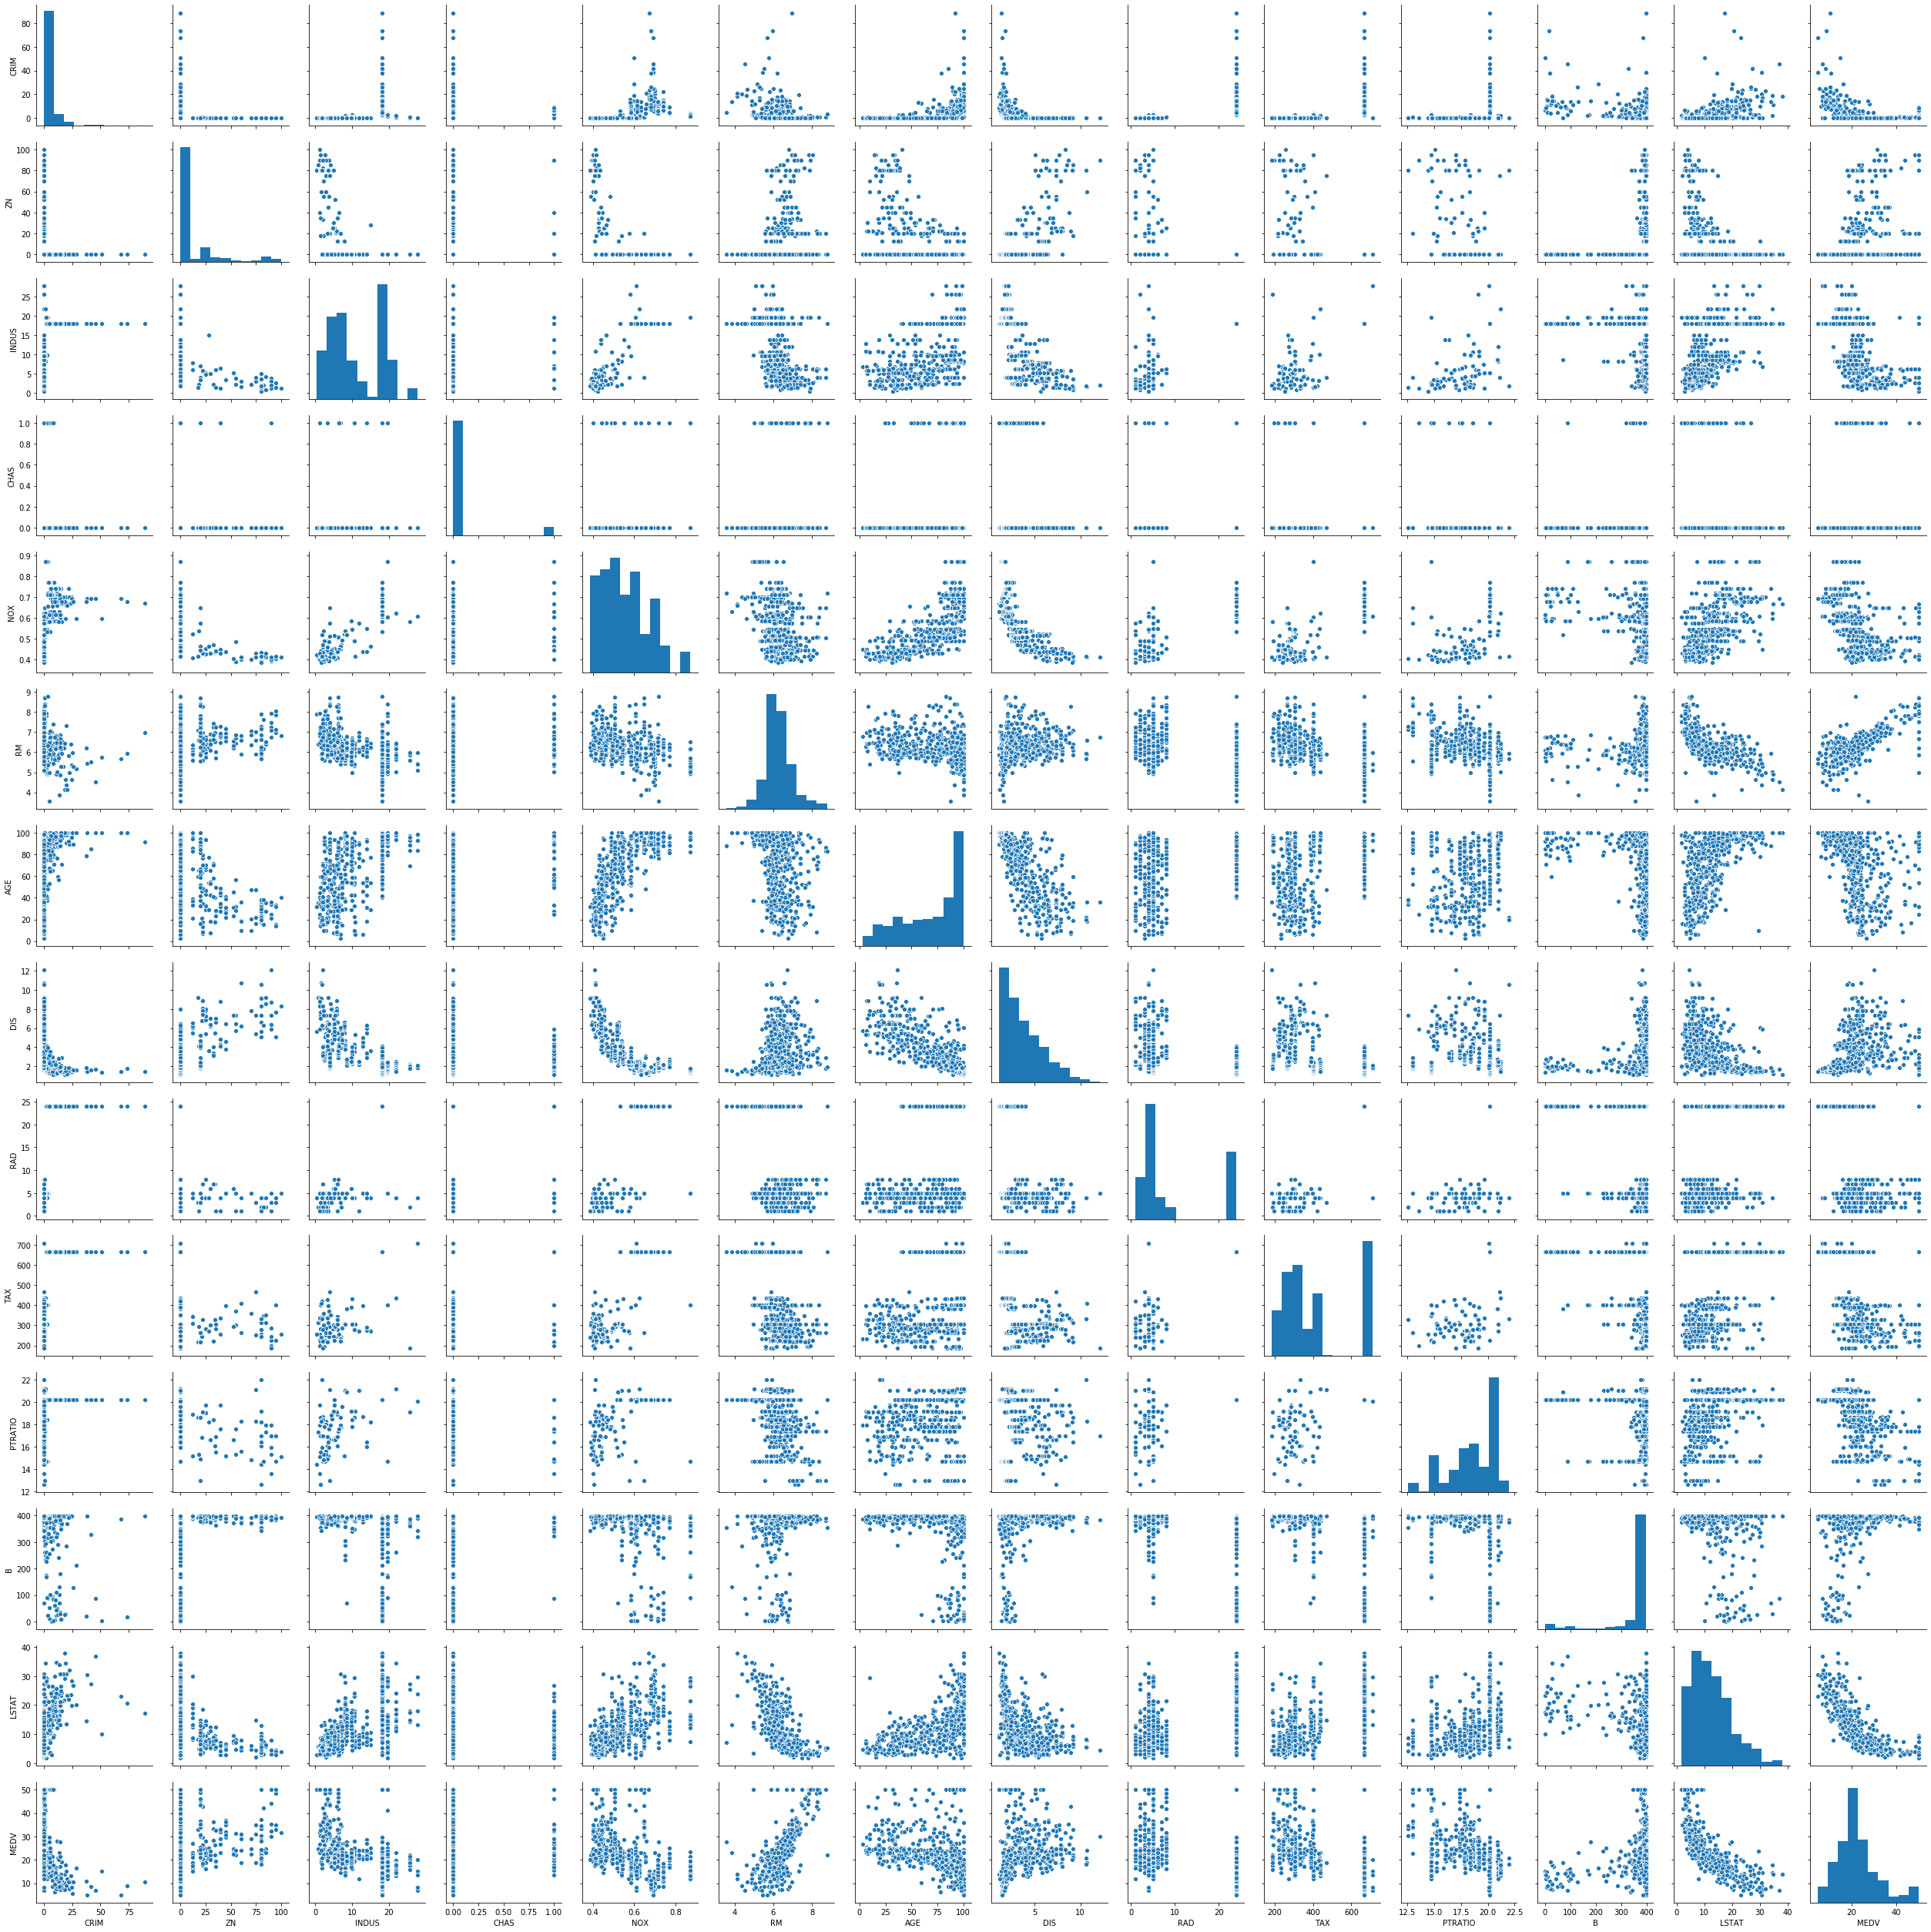

In [25]:
# scatter plot matrix - Seaborn
sns.pairplot(dataset);

Podemos ver que algunos de los atributos correlacionados más altos muestran una buena estructura en su relación. No lineal, pero agradables relaciones curvas predecibles.

<a id="section321"></a>
### <font color="#004D7F"> Correlación entre atributos</font>
Parece que también hay alguna estructura en el orden de los atributos. El amarilo sugiere una correlación positiva mientras que el azul oscuro una coorelación negativa. 

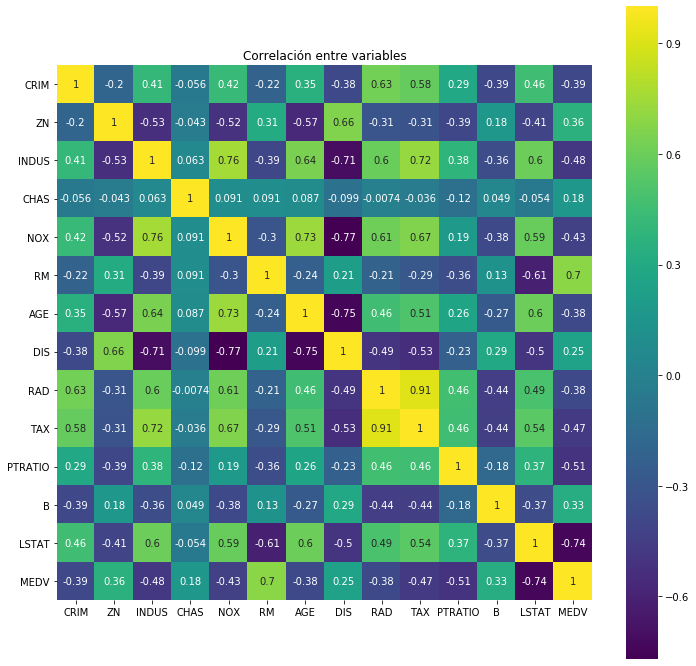

In [33]:
correlation = dataset.corr()
plt.figure(figsize=(12,12))
ax = sns.heatmap(correlation, vmax=1, square=True, annot = True, cmap = 'viridis')
# Esto se ponde debido al bug de Matplotlib 3.1.1 (quitarlo en versiones diferentes)
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)
# ----------
plt.title('Correlación entre variables')
plt.show()

Como análisis podemos extraer:
* Entre las características también podemos ver algo de amarillo oscuro y azul oscuro que sugieren candidatos para la eliminación para mejorar el Accuracy de los modelos.
* Entre la característica `CHAS` y la clase `MEDV` podemos ver una correlación casi nula por lo que podría anularse.
Algunos de estos análisis lo veremos más adelante.

<a id="section33"></a>
## <font color="#004D7F"> 3.3. Resumen de ideas</font>

Hay mucha estructura en este conjunto de datos. Necesitamos pensar en las transformaciones que podríamos usar más tarde para exponer mejor la estructura, lo que a su vez puede mejorar el Accuracy del modelado. Hasta ahora valdría la pena intentar:
* Feature Selection y eliminación de características más correlacionados.
* Normalización del conjunto de datos para reducir el efecto de diferentes escalas.
* Estandarizar el conjunto de datos para reducir los efectos de diferentes distribuciones.
Con mucho tiempo adicional también exploraría la posibilidad de _[Binning](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization.html)_ (discretización) de los datos, también en [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html). Esto a menudo puede mejorar Accuracy de los algoritmos de árbol de decisión.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section4"></a>
# <font color="#004D7F"> 4. Fase de modelado</font>

Ahora es el momento de crear algunos modelos de datos y estimar su Accruacy en datos no etiquetados. Esto es lo que vamos a cubrir en este paso:
* Crear conjunto de validación.
* Evaluación de línea base.
* Evaluar algoritmos: Estandarización.

<a id="section41"></a>
## <font color="#004D7F"> 4.1. Crear conjunto de validación</font>

Es una buena idea utilizar un conjunto de validación. Esta es una muestra de los datos que retenemos de nuestro análisis y modelado. Lo usamos justo al final de nuestro proyecto para confirmar el Accuracy de nuestro modelo final. Es una prueba que podemos usar para ver si nos equivocamos y para darnos confianza en nuestras estimaciones de Accuracy en datos no etiquetados. Dividiremos el conjunto de datos cargado en dos, el 80% de los cuales utilizaremos para entrenar nuestros modelos y el 20% como un conjunto de datos de validación

In [35]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, 
                                               test_size=validation_size, random_state=seed)

Ahora tiene datos de entrenamiento en `X_train` e `Y_train` para preparar modelos y conjuntos de `X_validation` e `Y_validation` que podemos usar más adelante.

<a id="section42"></a>
## <font color="#004D7F"> 4.2. Evaluación de línea base</font>

No sabemos qué algoritmos funcionarán bien en este conjunto de datos. Podemos intuir que algoritmos de regresión como la LiR y ElasticNet (EN) pueden funcionar bien. También es posible que los CART e incluso SVM funcionen bien, aunque debemos probar. Utilizaremos la validación cruzada 10 _fold_. El conjunto de datos no es demasiado pequeño y esta es una buena configuración de prueba estándar. Evaluaremos algoritmos utilizando la métrica de error cuadrático medio (MSE). MSE dará una idea general de cuán erróneas son todas las predicciones (0 es perfecto)

Posteriormente, creamos una línea base de rendimiento en este problema y verifiquemos varios algoritmos diferentes. Seleccionaremos un conjunto de algoritmos diferentes capaces de trabajar en este problema de clasificación. Los seis algoritmos seleccionados incluyen:
* __Algoritmos lineales:__ LiR, LASSO y EN.
* __Algoritmos no lineales:__ CART, SVM y $k$-NN.

In [45]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

# Spot Check Algorithms
models = []
models.append(('LiR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('k-NN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

Todos los algoritmos usan hiperparámetros predeterminados. Comparemos los algoritmos. Mostraremos la media y la desviación estándar de MSE para cada algoritmo a medida que lo calculemos y recopilemos los resultados para su uso posterior.

In [46]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():,.3f} ({cv_results.std():,.3f})")

LiR: -21.380 (9.414)
LASSO: -26.424 (11.651)
EN: -27.502 (12.305)
k-NN: -41.896 (13.902)
CART: -23.242 (9.783)
SVR: -67.828 (29.049)


Podemos ver que LiR es el que obtiene el mejor rendimiento seguido muy de cerca de CART. Siempre es aconsejable observar la distribución de las métricas calculados en los _folds_ de validación cruzada. Podemos hacerlo gráficamente usando Boxplot.

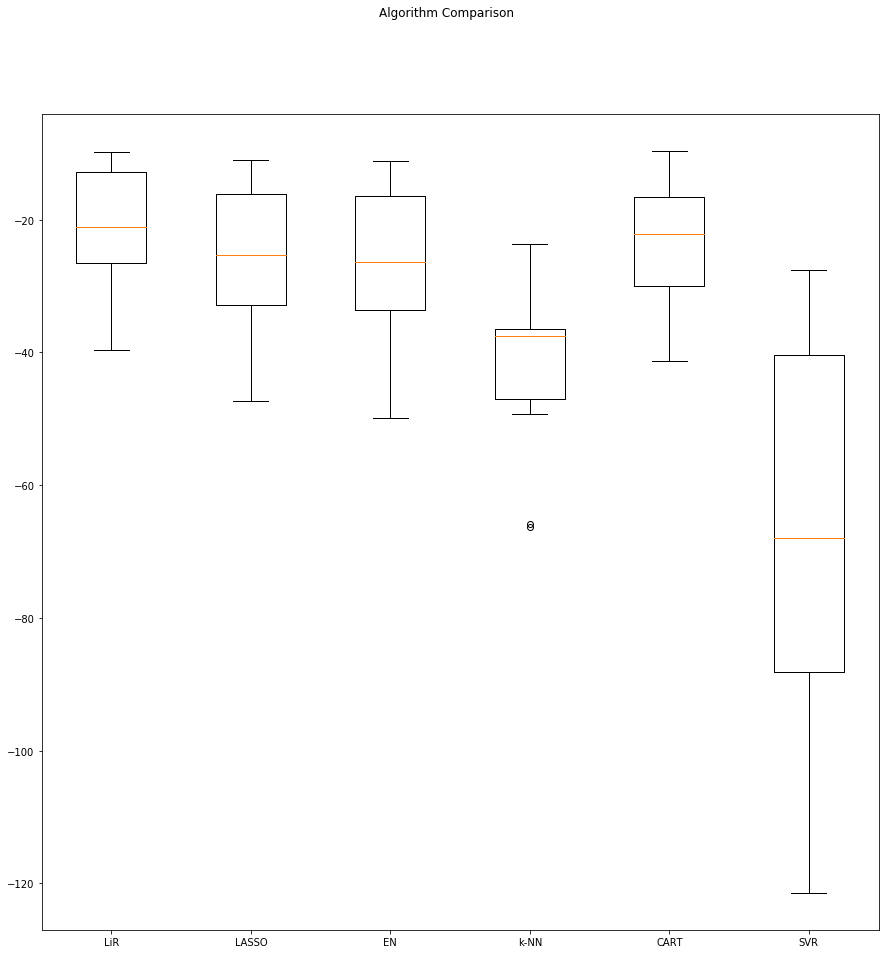

In [47]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Las diferentes escalas de los datos probablemente están perjudicando la habilidad de todos los algoritmos y quizás más para SVM y $k$-NN. 

En la siguiente sección veremos cómo ejecutar los mismos algoritmos utilizando una copia estandarizada de los datos.

<a id="section43"></a>
## <font color="#004D7F"> 4.3. Evaluar modelos: estandarización</font>

Sospechamos que las diferentes distribuciones de los datos en bruto pueden estar afectando negativamente a la habilidad de algunos de los algoritmos. Vamos a evaluar los mismos algoritmos con una copia estandarizada del conjunto de datos. Aquí es donde los datos se transforman de manera que cada atributo tenga un valor medio de cero y una desviación estándar de uno. 

También debemos evitar la fuga de datos cuando transformamos los datos. Una buena manera de evitar fugas es usar Pipelines que estandaricen los datos y construyan el modelo para cada _fold_ de la validación cruzada. De esa forma podemos obtener una estimación justa de cómo cada modelo con datos estandarizados podría funcionar en datos no vistos.

In [49]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLiR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('Scaledk-NN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():,.3f} ({cv_results.std():,.3f})")

ScaledLiR: -21.380% (9.414%)
ScaledLASSO: -26.607% (8.979%)
ScaledEN: -27.932% (10.587%)
Scaledk-NN: -20.108% (12.377%)
ScaledCART: -25.171% (12.435%)
ScaledSVM: -29.633% (17.009%)


Ejecutar el ejemplo proporciona una lista de errores cuadrados medios. Podemos ver que el escalado tuvo un efecto en $k$-NN, conduciendo el error más bajo que los otros modelos.

Echemos un vistazo a la distribución de las puntuaciones en los _fold_ de validación cruzada.

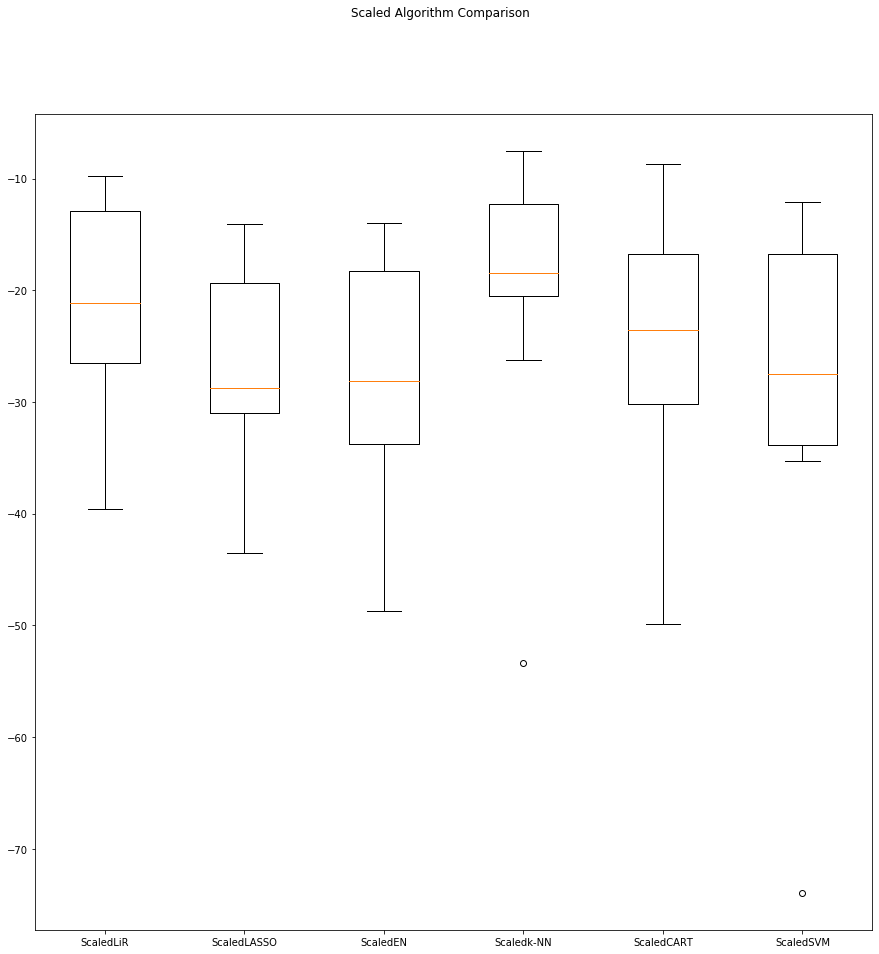

In [50]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Podemos ver que $k$-NN tiene una distribución estrecha de error y tiene la puntuación más baja.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section5"></a>
# <font color="#004D7F"> 5. Fase de Optimización</font>

En esta sección investigamos el ajuste de los parámetros para el algoritmo $k$-NN.

<a id="section51"></a>
## <font color="#004D7F"> 5.1. Optimización de $k$-NN</font>

Podemos comenzar ajustando el número de vecinos para $k$-NN. El número predeterminado de vecinos es 7. A continuación, probamos todos los valores impares de _k_ del 1 al 21, cubriendo el valor predeterminado de 7. Cada valor de _k_ se evalúa utilizando una validación cruzada 10 veces en el conjunto de datos estandarizado de entrenamiento. Podemos imprimir la configuración que resultó en el más alto Accuracy, así como la Accuracy de todos los valores probados. Ejecutando el ejemplo, vemos los resultados a continuación.

In [53]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{param}: {mean:,.2f} ({stdev:,.2f})")

Best: -18.10930386178861 using {'n_neighbors': 3}
{'n_neighbors': 1}: -20.17 (14.99)
{'n_neighbors': 3}: -18.11 (12.88)
{'n_neighbors': 5}: -20.06 (12.14)
{'n_neighbors': 7}: -20.51 (12.28)
{'n_neighbors': 9}: -20.32 (11.55)
{'n_neighbors': 11}: -20.96 (11.54)
{'n_neighbors': 13}: -21.10 (11.87)
{'n_neighbors': 15}: -21.51 (11.47)
{'n_neighbors': 17}: -22.74 (11.50)
{'n_neighbors': 19}: -23.83 (11.28)
{'n_neighbors': 21}: -24.32 (11.85)


Podemos ver que la configuración óptima es $k=3$ que nos da, diferencia el mejor MSE con -18.11 (12.88).

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section6"></a>
# <font color="#004D7F"> 6. Algoritmos ensamblados</font>

Otra forma en que podemos mejorar el rendimiento de los algoritmos en este problema es mediante el uso de modelos ensamblados. 

<a id="section61"></a>
## <font color="#004D7F"> 6.1. Comparar algoritmos ensamblados</font>

En esta sección evaluaremos cuatro algoritmos ensamblados diferentes, dos tipo Boosting y dos tipo  Bagging:
* Métodos Boosting: AdaBoost (AB) y Gradient Boosting (GBM).
* Métodos Bagging: Random Forest (RF) y Extra Trees (ET).

Utilizaremos una validación cruzada de 10 y un Pipeline que estandarizan los datos de entrenamiento para cada _fold_.

In [63]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():,.2f} ({cv_results.std():,.2f})")

ScaledAB: -15.50 (6.89)
ScaledGBM: -10.26 (4.55)
ScaledRF: -12.19 (6.45)
ScaledET: -9.38 (5.36)


Ejecutar el ejemplo calcula el error cuadrático medio para cada método utilizando los parámetros predeterminados. Podemos ver que generalmente estamos obteniendo mejores puntajes que nuestros algoritmos lineales y no lineales en secciones anteriores.

También podemos trazar la distribución de puntajes en los _fold_ de validación cruzada.

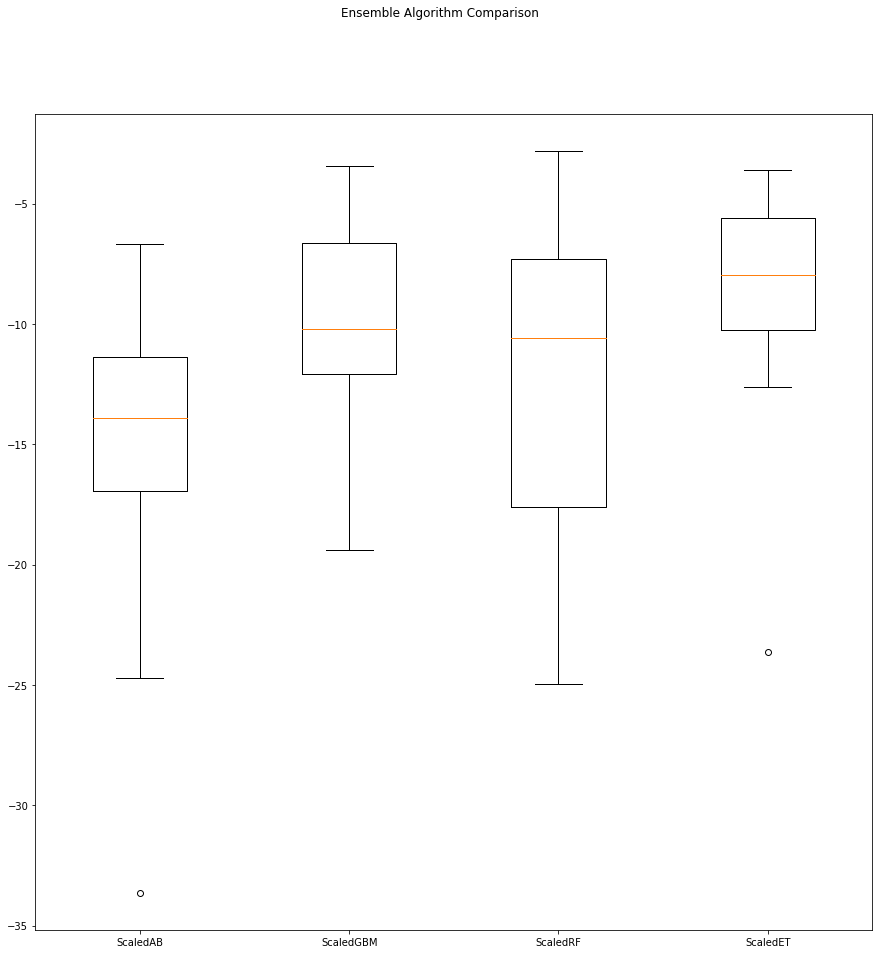

In [56]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Parece que GBM tiene una mejor puntuación media, también parece que ET tiene una distribución similar y tal vez una mejor puntuación media.

<a id="section62"></a>
## <font color="#004D7F"> 6.2. Fase de optimización GBM</font>

El número predeterminado de etapas de refuerzo para realizar (`n_estimators`) es 100. Este es un buen parámetro candidato de GBM para optimizar. A menudo, cuanto mayor sea el número de etapas de impulso, mejor será el rendimiento, pero mayor será el tiempo de entrenamiento. En esta sección, veremos cómo ajustar el número de etapas para aumentar el gradiente. 

A continuación, definimos una `GridSearchCV` con valores de estimadores de 50 a 400 en incrementos de 50. Cada configuración se evalúa mediante una validación cruzada de 10.

In [65]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

Como antes, podemos resumir la mejor configuración y tener una idea de cómo cambió el rendimiento con cada configuración diferente.

In [66]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{param}: {mean:,.3f} ({stdev:,.3f})")

Best: -9.379670 using {'n_estimators': 400}
{'n_estimators': 50}: -10.813 (4.857)
{'n_estimators': 100}: -10.057 (4.567)
{'n_estimators': 150}: -9.718 (4.405)
{'n_estimators': 200}: -9.565 (4.394)
{'n_estimators': 250}: -9.477 (4.376)
{'n_estimators': 300}: -9.454 (4.385)
{'n_estimators': 350}: -9.395 (4.368)
{'n_estimators': 400}: -9.380 (4.382)


Podemos ver que la mejor configuración fue `n_estimators = 400`, lo que resultó en un error cuadrático medio de -9.380, casi 1 unidad mejor que el método no optimizado.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section7"></a>
# <font color="#004D7F"> 7. Fase de Forecasting</font>

En esta sección finalizaremos el modelo de aumento de gradiente y lo evaluaremos en nuestro conjunto de datos de validación. Primero necesitamos preparar el modelo y entrenarlo en todo el conjunto de datos de entrenamiento. Esto incluye estandarizar el conjunto de datos de entrenamiento antes del entrenamiento.

In [67]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Luego podemos escalar las entradas para el conjunto de datos de validación y generar predicciones.

In [68]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.902132586880027


Podemos ver que el error cuadrático medio estimado es 11.8, cercano a nuestra estimación de -9.3.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>